# Business Problem: Sales Pipeline Conversion at a SaaS Startup
 


This assignment is around a case study about TechnoServe, a fictional tech SaaS (Software as a service) startup that specialises in different types of cloud-based software services to the small and medium enterprise customers. The products provided by the company are inclined towards increasing the productivity for the customers.

The revenue that the company generates is highly dependent on the consumption of the cloud services that they provide. Therefore, the revenue in-flow in the company is highly dependent on the number of clients that the company has. The company is facing a very pertinent problem faced in the IT industry today, declining conversions across its sales funnel.

 

The problem that the company is facing is that its pipeline conversion percentage has dropped from 35% at the end of the last fiscal (FY 2019-20) to 25% at present. The company needs a solution to solve the issue, and they have asked you to come up with one.

 
    Here are a few details about TechnoServe that you should be aware of:

The company is based out of Pune and started its operations in 2010.
It has clients spread over Pune and other cities as well.
There are more than 600 employees, distributed over multiple teams.
It has a wide variety of IT solutions spread across different industries.
To get a brief idea about IT solutions,

## Problem Statement


Understand the problem, come up with possible hypotheses for low conversions faced by TechnoServe. Once that is done, you need to analyse the dataset given below to validate the hypotheses and form the solution strategy that they should employ to solve the problem. 
The dataset and the data dictionary are given below

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_excel("Sales Dataset.xlsx")
df.head()

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Opportunity ID                  78025 non-null  object
 1   Technology
Primary              78025 non-null  object
 2   City                            78025 non-null  object
 3   B2B Sales Medium                78025 non-null  object
 4   Sales Velocity                  78025 non-null  int64 
 5   Opportunity Status              78025 non-null  object
 6   Sales Stage Iterations          78025 non-null  int64 
 7   Opportunity Size (USD)          78025 non-null  int64 
 8   Client Revenue Sizing           78025 non-null  object
 9   Client Employee Sizing          78025 non-null  object
 10  Business from Client Last Year  78025 non-null  object
 11  Compete Intel                   68768 non-null  object
 12  Opportunity Sizing              78025 non-null

In [5]:
df.shape

(78025, 13)

In [6]:
df.describe()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD)
count,78025.000000,78025.000000,78025.000000
mean,43.595348,2.955732,30085.664992
std,26.585600,1.497242,21169.932617
min,0.000000,1.000000,0.000000
25%,19.000000,2.000000,13816.000000
50%,43.000000,3.000000,29845.000000
75%,65.000000,3.000000,43185.000000
max,210.000000,23.000000,149981.000000


# Duplicate Check

In [7]:
df_dub = df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
df_dub.drop_duplicates(subset=None, inplace=True)
df_dub.shape

(78025, 13)

In [8]:
df.shape

(78025, 13)

The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset.

# Data Preparation

Converting some binary variables (Won/Lost) to 1/0

In [ ]:
# List of variables to map

varlist =  ['Opportunity Status']

# Defining the map function
def binary_map(x):
    return x.map({'Won': 1, "Loss": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)
df.head()

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,1,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,0,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,1,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,0,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,0,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


In [10]:
#Dproping 'Opportunity ID' field as it will not help to take decision 
df= df.drop(['Opportunity ID'],axis=1)
df.head()

,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,ERP Implementation,Bengaluru,Marketing,76,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,ERP Implementation,Delhi,Enterprise Sellers,63,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,Technical Business Solutions,Delhi,Enterprise Sellers,24,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,Technical Business Solutions,Mumbai,Enterprise Sellers,16,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,ERP Implementation,Delhi,Enterprise Sellers,69,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


In [11]:
df['Technology\nPrimary'].value_counts()

Technology\nPrimary
ERP Implementation              49810
Technical Business Solutions    27325
Legacy Modernization              609
Analytics                         281
Name: count, dtype: int64

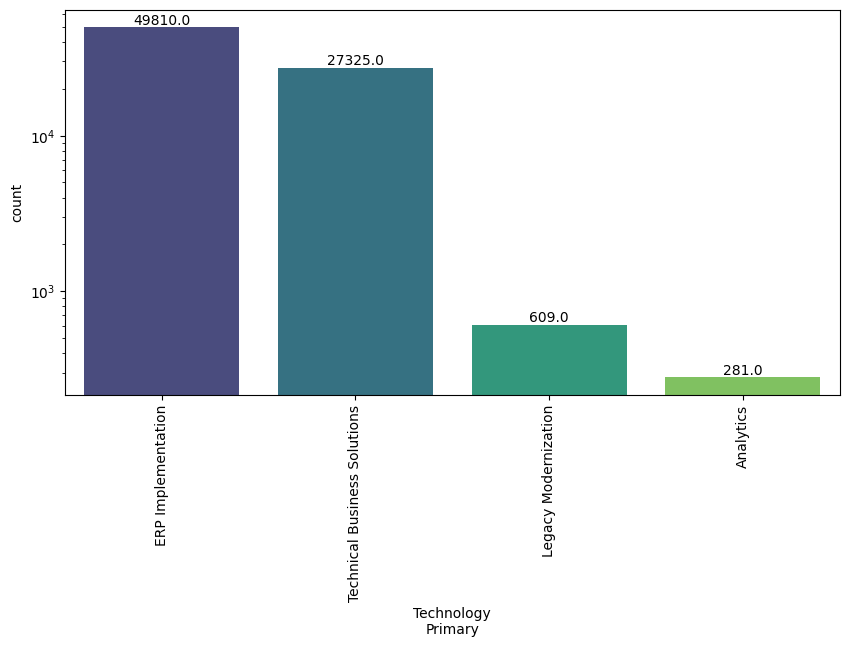

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it's already defined
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=df["Technology\nPrimary"], hue=df["Technology\nPrimary"], palette='viridis', dodge=False, legend=False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')
ax.set_yscale("log")
plt.xticks(rotation=90)
plt.show()


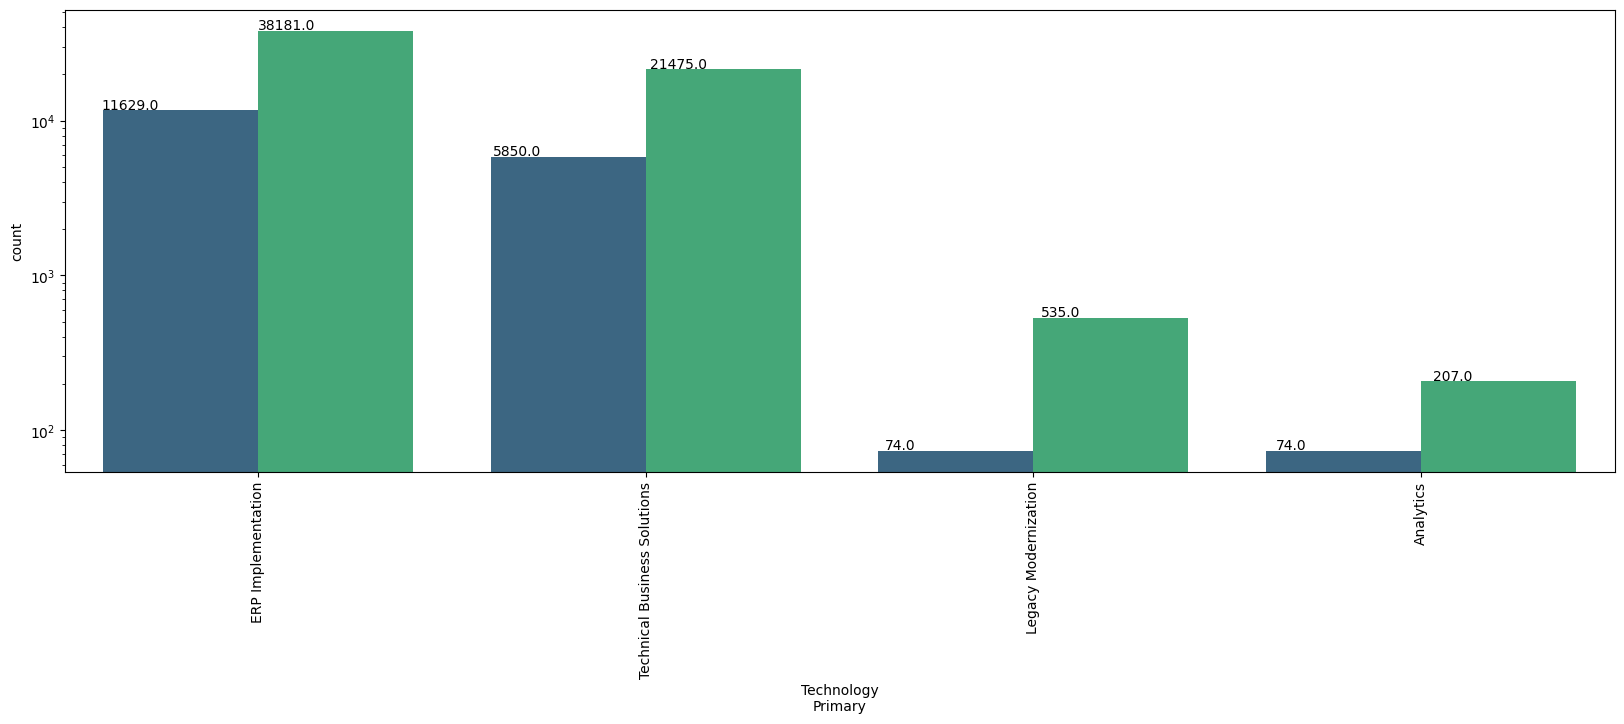

In [23]:
# Assuming df is your DataFrame and it's already defined
plt.figure(figsize=(20, 6))
ax = sns.countplot(x="Technology\nPrimary", hue="Opportunity Status", palette='viridis', legend=False,data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()


In [24]:
df['City'].value_counts()

City
Mumbai       21020
Delhi        15142
Bengaluru     9552
Hyderabad     9232
Pune          8153
Chennai       7568
Kolkata       7358
Name: count, dtype: int64

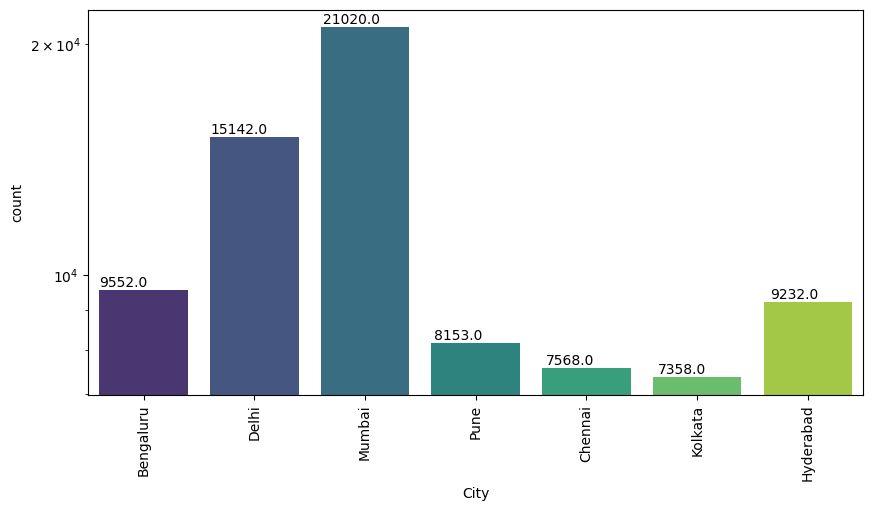

In [25]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="City",hue=df["City"],palette='viridis', legend=False,data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set_yscale('log')
plt.xticks(rotation = 90)
plt.show()
